In [4]:
import pandas as pd
data = pd.read_csv("../../data/GEOData/gsm_metadata_with_taxonomycats_curated.tsv", sep='\t')
data.rename(columns={"LnEx_no rank_TaxId":"LnEx_no_rank_TaxId"}, inplace=True)

<AxesSubplot:title={'center':'Superkingdom Distribution'}>

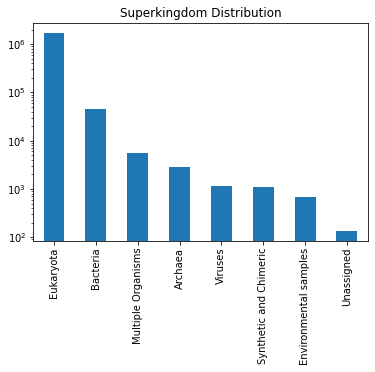

In [4]:
data.taxonomic_category.value_counts().plot(kind="bar", logy=True, title="Superkingdom Distribution")

In [5]:
bacteria = data[data.taxonomic_category == "Bacteria"]

<AxesSubplot:title={'center':'Most represented bacteria'}>

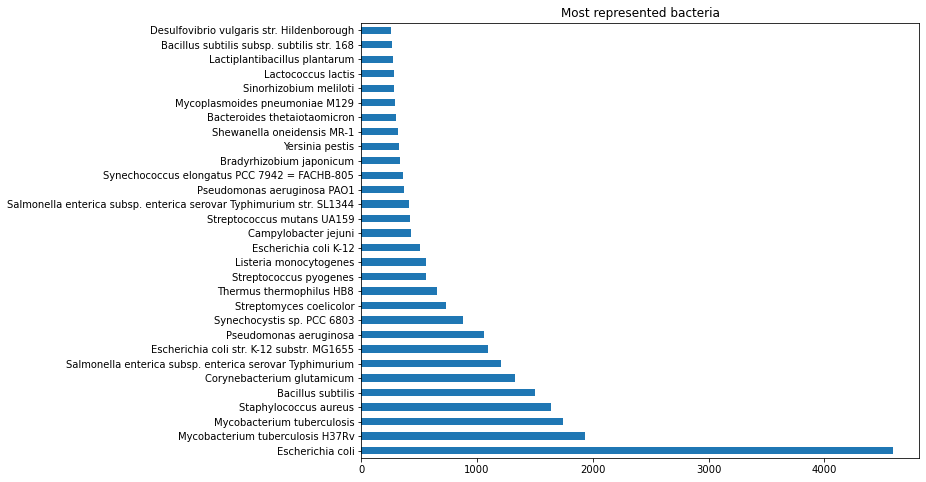

In [6]:
bacteria.taxon.value_counts().head(n=30).plot(kind="barh", title="Most represented bacteria", figsize=(10,8))

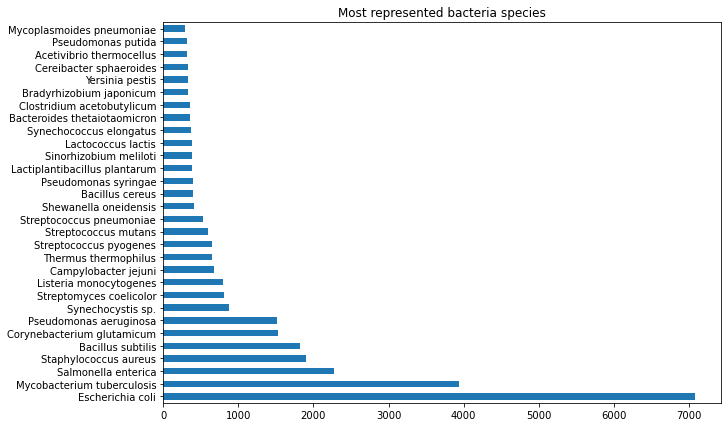

In [13]:
specie = bacteria.taxon.apply(func=lambda x : ' '.join(x.split(' ')[:2]))
specie.value_counts().head(n=30).plot(kind="barh", title="Most represented bacteria species", figsize=(10,7)).get_figure().savefig("bacteriaMicroArrayData.jpg", bbox_inches="tight")

In [15]:
import re
def class_sup(row):
    man  = row.manufacturer
    dist = row.distribution
    file = row.suppFile
    procesable = 0

    if type(file) == float or type(man) == float or  type(dist) == float: return("Unprocesable")
    if dist == "commercial": 
        if re.search("affymetrix", man, flags=re.IGNORECASE) and re.search("cel", file, flags=re.IGNORECASE): procesable = 1
        if re.search("agilent", man, flags=re.IGNORECASE) and re.search("txt", file, flags=re.IGNORECASE): procesable = 1
        if re.search("nimble", man, flags=re.IGNORECASE) and re.search("pair", file, flags=re.IGNORECASE): procesable = 1
        if re.search("illumina", man, flags=re.IGNORECASE) and re.search("idat", file, flags=re.IGNORECASE): procesable = 1
    if procesable : return("Procesable")
    return("Semiprocesable")


In [6]:
gpl = pd.read_csv("../../data/GEOData/GPLs_metadata_complete.tsv", sep='\t')

In [25]:
gpl.columns

Index(['GPL', 'title', 'geo_accession', 'status', 'submission_date',
       'last_update_date', 'technology', 'distribution', 'organism', 'taxid',
       'manufacturer', 'manufacture_protocol', 'description', 'contact_name',
       'contact_email', 'contact_laboratory', 'contact_department',
       'contact_institute', 'contact_address', 'contact_city', 'contact_state',
       'contact_zip/postal_code', 'contact_country', 'supplementary_file',
       'sample_id', 'series_id', 'data_row_count', 'contact_phone', 'support',
       'contributor', 'coating', 'contact_fax', 'relation', 'pubmed_id',
       'web_link', 'contact_web_link', 'catalog_number', 'citation'],
      dtype='object')

In [31]:
dont_show = gpl.columns.isin(['title', 'geo_accession', 'status', 'submission_date',
       'last_update_date','manufacture_protocol', 'description', 'contact_name',
       'contact_email', 'contact_laboratory', 'contact_department',
       'contact_institute', 'contact_address', 'contact_city', 'contact_state',
       'contact_zip/postal_code', 'contact_country','pubmed_id',
       'web_link', 'contact_web_link', 'catalog_number', 'citation','contact_phone', 'support',
       'contributor', 'coating', 'contact_fax',  'sample_id', 'series_id', "data_row_count", "relation"])

In [52]:
mini_gpl = gpl.loc[:, ~dont_show]

In [53]:
temp = bacteria[["Accession", "taxon", "GPL", "suppFile"]]
temp.loc[:,"specie"] = bacteria.taxon.apply(func=lambda x : ' '.join(x.split(' ')[:2]))
temp.loc[:, "GPL"] = bacteria.GPL.apply(func=lambda x: f"GPL{(int(x))}")

/export/apps/bioconda/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/export/apps/bioconda/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [54]:
mini_gpl.columns = [f"GPL_{col}" if col != "GPL" else col for col in mini_gpl.columns]
temp = temp.merge(mini_gpl)

In [60]:
temp.to_csv("/export/storage/users/diegocar/PerspectivePlots/data/bacteriaGPLMeta.tsv", sep = '\t', index=False)

In [58]:
help(pd.DataFrame.to_csv)

Help on function to_csv in module pandas.core.generic:

to_csv(self, path_or_buf: 'Optional[FilePathOrBuffer]' = None, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'Optional[str]' = None, columns: 'Optional[Sequence[Label]]' = None, header: 'Union[bool_t, List[str]]' = True, index: 'bool_t' = True, index_label: 'Optional[IndexLabel]' = None, mode: 'str' = 'w', encoding: 'Optional[str]' = None, compression: 'CompressionOptions' = 'infer', quoting: 'Optional[int]' = None, quotechar: 'str' = '"', line_terminator: 'Optional[str]' = None, chunksize: 'Optional[int]' = None, date_format: 'Optional[str]' = None, doublequote: 'bool_t' = True, escapechar: 'Optional[str]' = None, decimal: 'str' = '.', errors: 'str' = 'strict', storage_options: 'StorageOptions' = None) -> 'Optional[str]'
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series was changed.
    
    Parameters
    ----------
    path_or_buf : str o

In [100]:
temp = temp[temp.distribution != "virtual"]

In [101]:
temp.loc[:, "Flag"] = [class_sup(row) for i,row in temp.iterrows()]

<AxesSubplot:title={'center':'Bacteria Raw data availability'}>

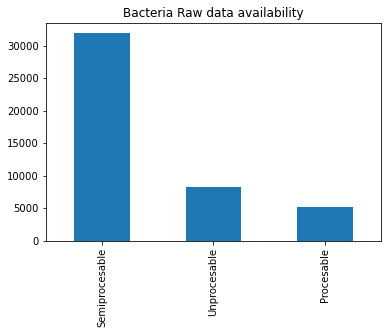

In [102]:
temp.Flag.value_counts().plot(kind="bar", title="Bacteria Raw data availability")

In [71]:
def f(x):
    if type(x) == float: return("None")
    if len(x.split(',')) > 1 : return("Multiple")
    return(x)

<AxesSubplot:title={'center':'SuppFile type distribution'}>

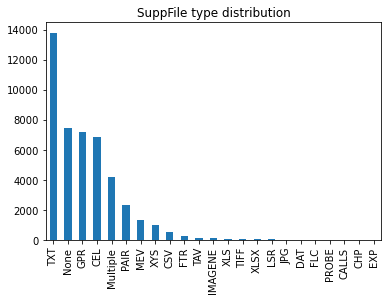

In [103]:
temp.suppFile.apply(f).value_counts().plot(kind="bar", title="SuppFile type distribution")

In [ ]:
pd.read_csv("../")

In [73]:
import matplotlib.pyplot as plt
def count(df, col1, col2, c):
    return(df[(~df[col1].isna()) & (df[col1].str.contains(c, case=False))][col2].value_counts())

def plot(data, col1, col2, patterns,**kargs):
    f = plt.figure()
    a = {man: count(data,col1, col2, man) for man in patterns}
    b = pd.DataFrame.from_dict(a).T
    b.plot( **kargs)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

def plot_2(data, col1, col2, patterns,**kargs):
    f = plt.figure()
    a = {man: count(data,col1, col2, man).sort_values(ascending=False).head() for man in patterns}
    b = pd.DataFrame.from_dict(a).T
    b.plot(**kargs)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()


<Figure size 432x288 with 0 Axes>

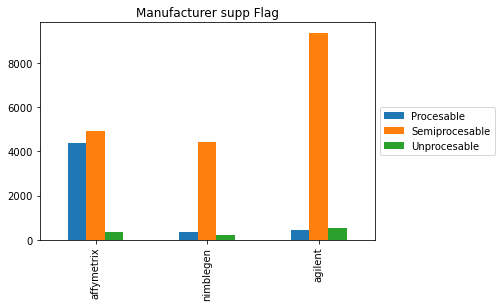

In [139]:
manufacturers = ["affymetrix",  "nimblegen", "agilent"]
plot(temp, "manufacturer", "Flag", manufacturers, title="Manufacturer supp Flag", kind="bar")

In [89]:
def man(x):
    if type(x) == float: return("None")
    if re.search("affymetrix", x, flags=re.IGNORECASE): return("Affymetrix")
    if re.search("agilent", x, flags=re.IGNORECASE): return("Agilent")
    if re.search("nimblegen", x, flags=re.IGNORECASE): return("NimbleGen")
    return(x[:20])


<AxesSubplot:title={'center':'Bacteria Manufacturer Distribution'}>

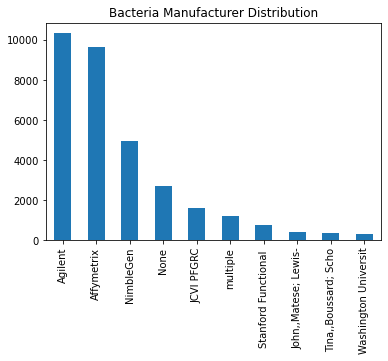

In [104]:
temp.manufacturer.apply(man).value_counts().head(n=10).plot(kind="bar", title="Bacteria Manufacturer Distribution")

In [138]:
a = temp.manufacturer.apply(man).value_counts()
a[a > max(a)*.265]

Agilent       10346
Affymetrix     9654
NimbleGen      4961
Name: manufacturer, dtype: int64

In [105]:
temp[temp.manufacturer.isna()].GPL.unique()

array(['GPL102', 'GPL1436', 'GPL2101', 'GPL17', 'GPL1246', 'GPL18',
       'GPL1746', 'GPL2114', 'GPL2110', 'GPL1325', 'GPL2109', 'GPL16',
       'GPL1353', 'GPL1343', 'GPL1396', 'GPL2129', 'GPL224', 'GPL1835',
       'GPL331', 'GPL548', 'GPL1305', 'GPL1076', 'GPL1482', 'GPL15',
       'GPL162', 'GPL1922', 'GPL1401', 'GPL965', 'GPL1791', 'GPL1821',
       'GPL280', 'GPL1983', 'GPL352', 'GPL370', 'GPL1338', 'GPL1438',
       'GPL1771', 'GPL212'], dtype=object)

In [145]:
with open("../../data/GEOData/bacterias_gsms_complete.txt", "w") as file:
    for bac in bacteria.Accession.unique():
        file.write(f"{bac}\n")